# Supervised Classification Learning Algorithms
## Support Vector Machine

### Importing Necessary Libraries


In [1]:
%matplotlib inline
import sklearn
import warnings
import matplotlib
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.base import clone
from sklearn import set_config
import matplotlib.pyplot as plt
from sklearn import preprocessing
from statistics import mean, stdev
from IPython.display import display
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold, StratifiedShuffleSplit, validation_curve, learning_curve
from sklearn.metrics import roc_curve, precision_score, accuracy_score, average_precision_score, recall_score, f1_score, classification_report, confusion_matrix


### Setting Graph Format Defaults

In [2]:
# Specify printing and plot dimensions 
pd.options.display.max_columns = None
matplotlib.rc('figure', figsize=[10,5])


# Initializing Random Seed to make experiments reproducible
np.random.seed(1126)

# setting config to print all parameters
set_config(print_changed_only=False)

### Uploading and Pre-process Data

In [3]:
# Upload Adult Dataset
adultdata = pd.read_csv('adult.csv',names=['age', 'workclass', 'fnlwgt','education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country'], index_col=False )
# print('--------------------------------- adultdata ---------------------------------')
# print(adultdata.head())
# print()
# print('-------------- adultdata info -------------')
# adultdata.info()
# print()
# print(adultdata.head())

# Upload credit Dataset
creditdata = pd.read_csv('creditdata.csv')
creditdata = creditdata.iloc[: , 1:]
newheader = list(creditdata.loc[0])
creditdata = creditdata.drop(labels=0, axis=0)
creditdata.columns = newheader
creditdata.reset_index(inplace=True)
# print('--------------------------------- creditdata ---------------------------------')
# print(creditdata.head())
# print()
# print('-------------- creditdata info -------------')
# creditdata.info()
# print()

### Data Preprocessing (Normalizing and Assigning Features and Target variables)

In [4]:
#split Adult dataset in features and target variable
adult_feature_cols = ['age', 'workclass', 'fnlwgt', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country']
adultX = adultdata.reindex(columns =adult_feature_cols) # Features
objcols = list(adultX.columns[adultX.dtypes.eq('object')])
# encode categorical variables
le = preprocessing.LabelEncoder()
# use df.apply() to apply le.fit_transform to all string columns
adultX[objcols] = adultX[objcols].apply(le.fit_transform)
intcols = list(adultX.columns[adultX.dtypes.eq('int64')])
adultX[intcols] = adultX[intcols].astype(float)
# print('adultX head')
# print(adultX.head())
# print(adultX.info())
# print()
# Assign Target Variable
adultY = adultdata.education # Target variable
# print( 'AdultY Value Counts before replacement')
# print(adultY.value_counts())
# print()
# All the college graduates = 1, all the non-college graduates = -1
adultY = adultY.replace(['Bachelors', 'Masters', 'Doctorate'], 1,regex=True)
adultY = adultY.replace(['Some-college', '11th', 'HS-grad', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', '9th', '7th-8th', '12th', '1st-4th', '10th', '5th-6th', 'Preschool'], -1,regex=True)
# print( 'AdultY Value Counts after replacement')
# print(adultY.value_counts())
# print()

#split Credit dataset in features and target variable
credit_feature_cols = ['LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
creditX = creditdata.reindex(columns =credit_feature_cols) # Features
# print('creditX head')
# print(creditX.head())
# print(creditX.info())
# print()
creditY = creditdata.reindex(columns =['default payment next month']) # Target variable
# print( 'CreditY Value Counts before replacement')
# print(creditY.value_counts())
# print()
# All the credit non-defaulters = 1, all the credit defaulters= -1
creditY = creditY.replace(['0','1'], [1,-1],regex=True)
# print( 'CreditY Value Counts after replacement')
# print(creditY.value_counts())
# print()



### Splitting the Datasets

In [5]:
# Splitting data into Train and Test sets
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=10)

# Splitting Adult Dataset
sss.get_n_splits(adultX, adultY)
for train_index, test_index in sss.split(adultX, adultY):
    adultx_train, adultx_test = adultX.loc[train_index], adultX.loc[test_index]
    adulty_train, adulty_test = adultY.loc[train_index], adultY.loc[test_index]

# Splitting Credit Dataset
sss.get_n_splits(creditX, creditY)
for train_index, test_index in sss.split(creditX, creditY):
    creditx_train, creditx_test = creditX.loc[train_index], creditX.loc[test_index]
    credity_train, credity_test = creditY.loc[train_index], creditY.loc[test_index]

### Building a Simple SVM object & Making Predictions

In [6]:
# Building a simple SVM object
clf = SVC(gamma='auto', class_weight='balanced')

#  SVM for Adult Data Set
clf.fit(adultx_train, adulty_train)
adulty_predtrain = clf.predict(adultx_train)
# # # adulty_predtest = clf.predict(adultx_test)

# # # # Neural Network for Credit Data Set
clf.fit(creditx_train, credity_train.values.ravel())
credity_predtrain = clf.predict(creditx_train)
# # # credity_predtest = clf.predict(creditx_test)

### Simple SVM Predictions Accuracy Measurements

In [7]:
# DT Adult Data Set Predictions
print("Adult Train Accuracy:", accuracy_score(adulty_train, adulty_predtrain))
print("Adult Pred Train Mean:",adulty_predtrain.mean())
print("Adult Pred Train f1 Score:", f1_score(adulty_train, adulty_predtrain, average='macro'))
print()


# DT Credit Data Set Predictions
print("Credit Train Accuracy:", accuracy_score(credity_train, credity_predtrain))
print("Credit Pred Train Mean:",credity_predtrain.mean())
print("Credit Pred Train f1 Score:", f1_score(credity_train, credity_predtrain, average='macro'))
print()

Adult Train Accuracy: 0.9984643734643734
Adult Pred Train Mean: -0.5367782555282555
Adult Pred Train f1 Score: 0.9978378101087109

Credit Train Accuracy: 0.992125
Credit Pred Train Mean: 0.5428333333333333
Credit Pred Train f1 Score: 0.9887059660124522



### Create validation curve helper function

In [10]:
def plot_val_curve(X, y, param_range,  param_name , estimator, title):
    
    train_scores, test_scores = validation_curve(
    estimator, X, y, param_name= param_name, param_range=param_range,
    scoring='f1_macro', n_jobs=-1,verbose=1, cv=10)

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    
    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel("Score")
#     plt.ylim(0.0, 1.1)

    plt.plot(param_range, train_scores_mean , "r-+", linewidth=2, label="Training score")
    plt.plot(param_range, test_scores_mean, "b-+", linewidth=2, label="Cross-validation score")
    plt.title(title)
    plt.legend()
    plt.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.3)
#     plt.gca().invert_xaxis()
    
    return plt

### Plot Validation curves to identify best number of estimators (n_estimator) parameter

In [13]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training instances")
    axes[0].set_ylabel("Score")
    
    train_sizes, train_scores, test_scores, fit_times, _ = \
    learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                   train_sizes=train_sizes,
                   return_times=True)
        
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training instances")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

### Plot Learning curves with simple SVM classifier

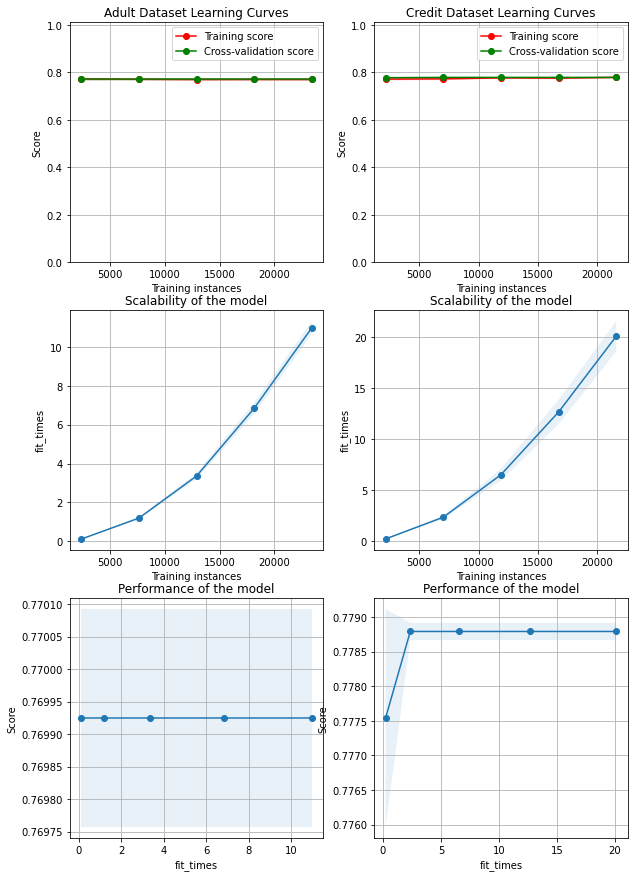

In [14]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))

X, y = adultx_train, adulty_train.values.ravel()

title = "Adult Dataset Learning Curves"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
# cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
estimator = SVC()
plot_learning_curve(estimator, title, X, y, axes=axes[:, 0], ylim=(0.0, 1.01),
                    cv=cv , n_jobs=4)

X, y = creditx_train, credity_train.values.ravel()

title = "Credit Dataset Learning Curves"
# SVC is more expensive so we do a lower number of CV iterations:
# cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
plot_learning_curve(estimator, title, X, y, axes=axes[:, 1], ylim=(0.0, 1.01),
                    cv=cv, n_jobs=4)

plt.show()

### Plot Learning curves with Gridsearch best estimator and StratifiedKfold

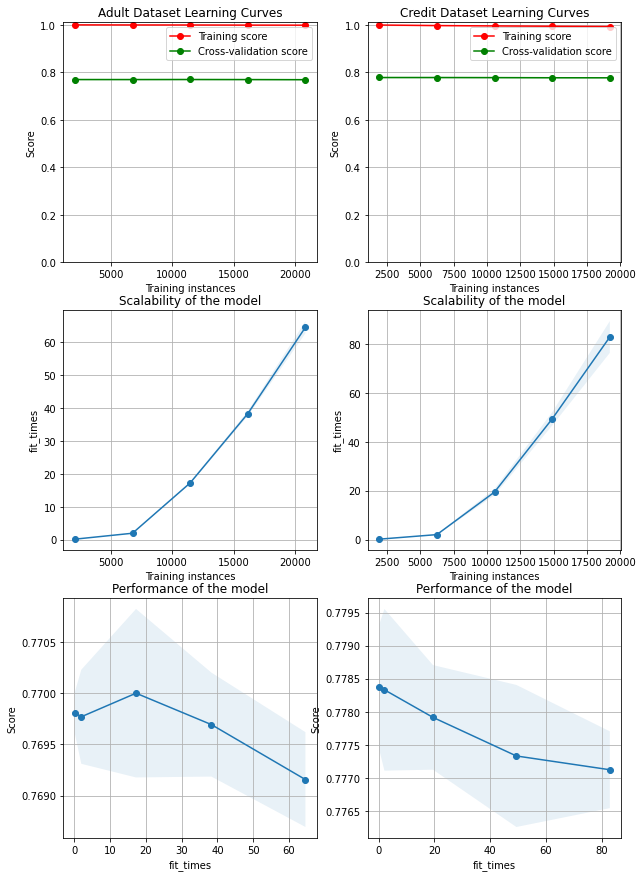

In [15]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))

X, y = adultx_train, adulty_train.values.ravel()

title = "Adult Dataset Learning Curves"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
# cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
# cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
estimator =SVC(C=1.0, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
plot_learning_curve(estimator, title, X, y, axes=axes[:, 0], ylim=(0.0, 1.01) , n_jobs=4)

X, y = creditx_train, credity_train.values.ravel()

title = "Credit Dataset Learning Curves"
# SVC is more expensive so we do a lower number of CV iterations:
# cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
# cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
estimator = SVC(C=1.0, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
plot_learning_curve(estimator, title, X, y, axes=axes[:, 1], ylim=(0.0, 1.01), n_jobs=4)

plt.show()

### Apply Best Model on test data

In [16]:
# Make Predictions on Adult Dataset
print("\n Adult Dataset Predictions Results")
best_adult_model =SVC(C=1.0, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
best_adult_model.fit(adultx_train, adulty_train.values.ravel())
adulty_predictions = best_adult_model.predict(adultx_test)
print(classification_report(adulty_test, adulty_predictions,digits=5))
print(confusion_matrix(adulty_test, adulty_predictions))

# Make Predictions on Credit Dataset
print("\n Credit Dataset Predictions Results")
best_credit_model = SVC(C=1.0, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
best_credit_model.fit(creditx_train, credity_train.values.ravel())
credity_predictions = best_credit_model.predict(creditx_test)
print(classification_report(credity_test, credity_predictions,digits=5))
print(confusion_matrix(credity_test, credity_predictions))



 Adult Dataset Predictions Results
              precision    recall  f1-score   support

          -1    0.77176   0.99382   0.86882      5015
           1    0.43636   0.01602   0.03091      1498

    accuracy                        0.76892      6513
   macro avg    0.60406   0.50492   0.44987      6513
weighted avg    0.69462   0.76892   0.67610      6513

[[4984   31]
 [1474   24]]

 Credit Dataset Predictions Results
              precision    recall  f1-score   support

          -1    0.41176   0.03165   0.05878      1327
           1    0.78213   0.98716   0.87277      4673

    accuracy                        0.77583      6000
   macro avg    0.59695   0.50941   0.46577      6000
weighted avg    0.70022   0.77583   0.69274      6000

[[  42 1285]
 [  60 4613]]
